In [1]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray} \large 
Z_{n+1} = (b - a*Z_{n}) / (d + c*Z_{n}^x)
\end{eqnarray}""")

<IPython.core.display.Latex object>

# flowerish figure: a numerical discovery.

    Sequential iteration of difference equation:
    Z = (b - a*Z) / (d + c*Z^x);
    
    with parameter set:
    x = 1.2759;
    a = 0 + 0.074647i;
    b = -0.77504 + 0.007449i;
    c = 1.2902 - 2.238e-18i;
    d = 0.12875;
    on the complex plane produces a flower like figure.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import display

sys.path.insert(1, '../src');
import z_plane as zp
import graphic_utility as gu;
import itergataters as ig
import numcolorpy as ncp

In [3]:
def de_Okeeffe(Z, p, Z0=None, ET=None):
    """ Z = de_Okeeffe(Z, p) 
    Args:
        Z:    a real or complex number
        p:    a real of complex number
    Returns:
        Z:    the result (complex)
    """
    Z = (p[2] - p[1]*Z) / (p[4] + p[3]*Z**p[0]);
    return Z

In [17]:
#                                        -- short escape distance
par_set = {'n_rows': 800, 'n_cols': 800}
par_set['center_point'] = -0.1-0.1j
par_set['theta'] = 0.0
par_set['zoom'] = 0.3

par_set['it_max'] = 32
par_set['max_d'] = 1 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

x = 1.2759;
a = 0 + 0.074647j;
b = -0.77504 + 0.007449j;
c = 1.2902 - 2.238e-18j;
d = 0.12875;
p = [x, a, b, c, d]
list_tuple = [(de_Okeeffe, (p))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(tt, '\t total time')

7.948682069778442 	 total time


In [18]:
#                  Escape Time Graphical norm - graphically easier data
t0 = time.time()
Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
print('converstion time =\t', time.time() - t0)

converstion time =	 1.4055249691009521


coloring time =	 3.6072988510131836


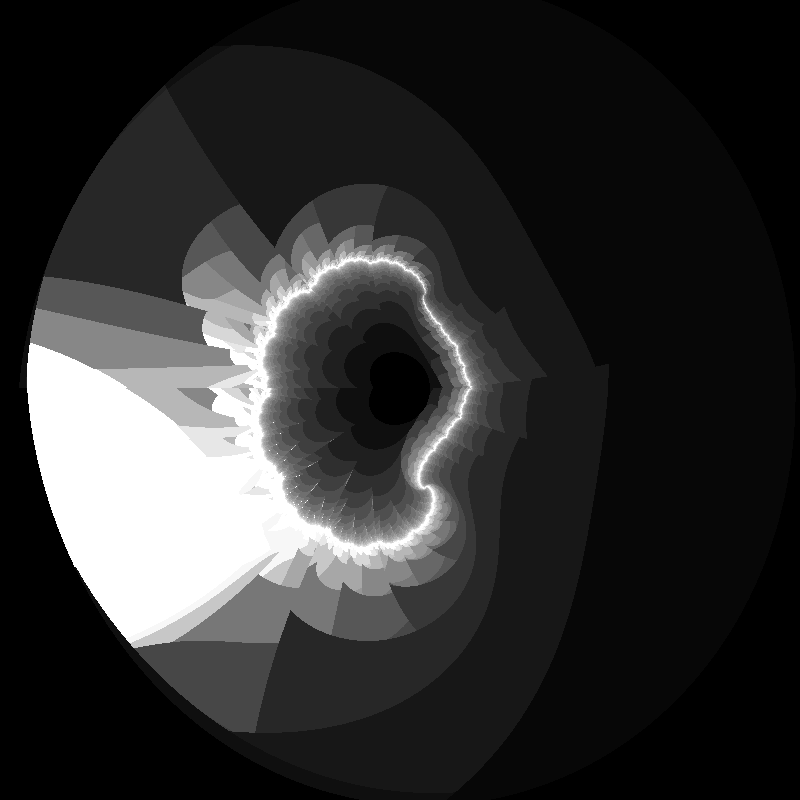

In [19]:
#                  Escape Time: darker escaped sooner
t0 = time.time()
ETd = ncp.mat_to_gray(ETn)
print('coloring time =\t',time.time() - t0)
display(ETd)

coloring time =	 3.665705919265747


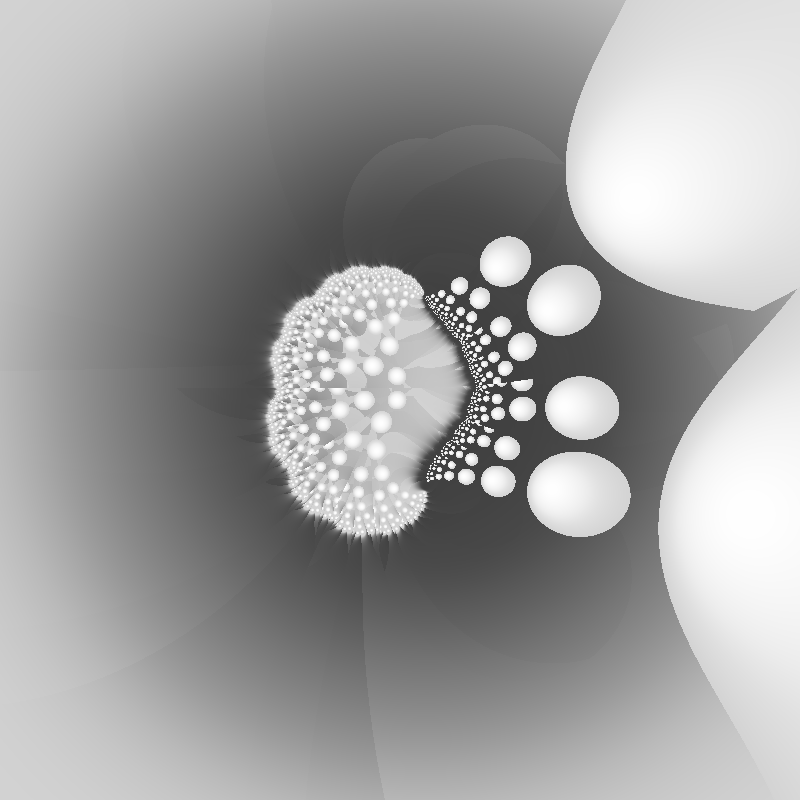

In [15]:
#                  Distance at Escape Time: lighter traveled further
t0 = time.time()
D = ncp.mat_to_gray(Zd, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(D)

coloring time =	 3.4289700984954834


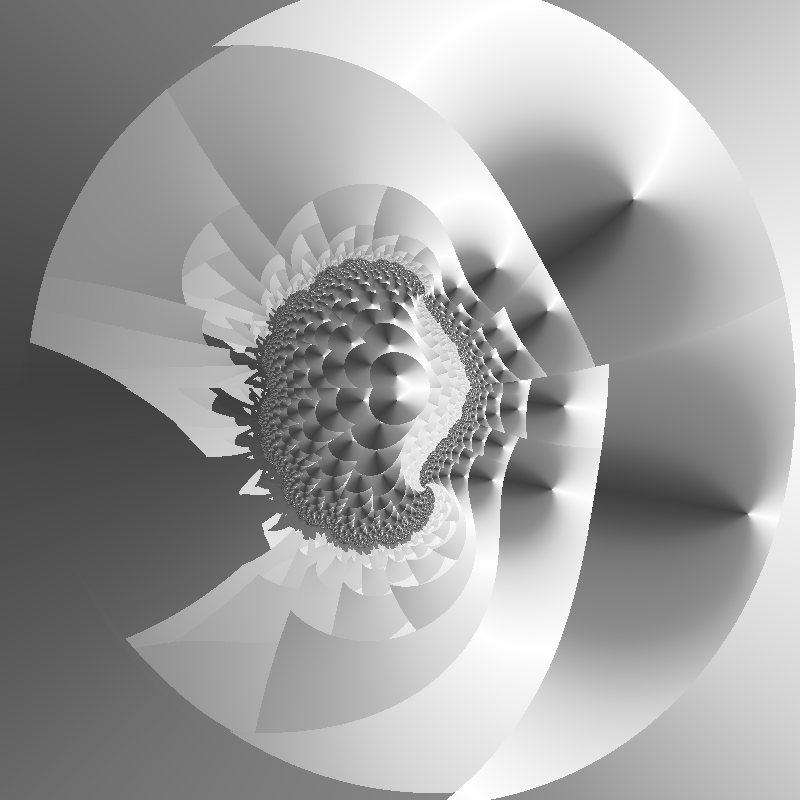

In [20]:
#                  Rotation at Escape Time: lighter rotated more
t0 = time.time()
R = ncp.mat_to_gray(Zr, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(R)

coloring time:	 6.147506952285767


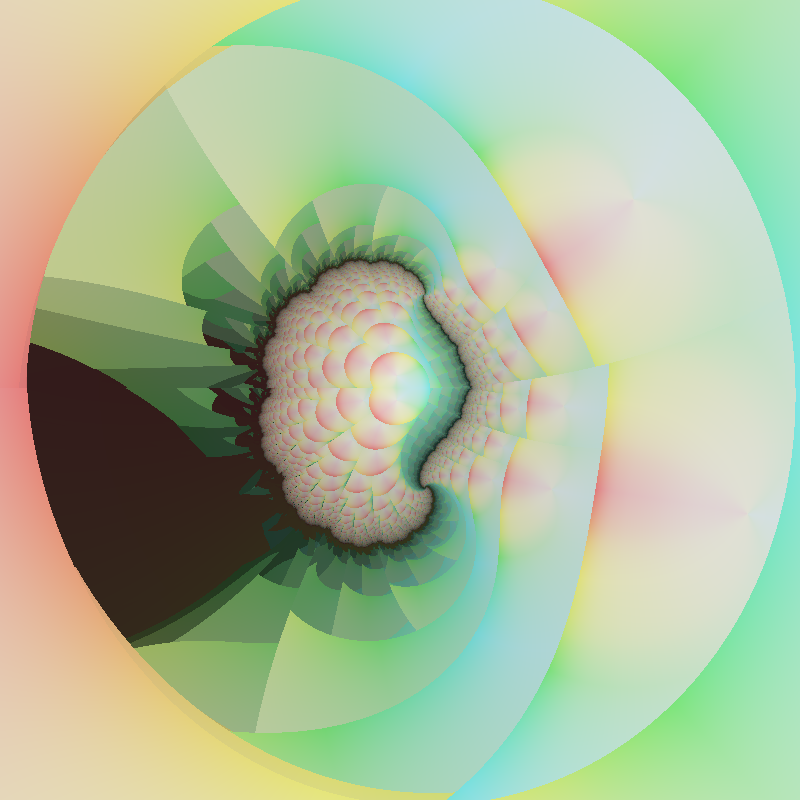

In [21]:
#                  Rotation > Hue, Distance > Saturation, Escape Time > Value (intensity-brightness) (muted)
H = Zr
S = 1 - ncp.graphic_norm(Zd)
V = 1 - ncp.graphic_norm(ET)

Hue_width = 0.5
H_min = 0.0
H_max = H_min + Hue_width

S_max = 0.5
S_min = 0.05

V_max = 0.9
V_min = 0.2
t0 = time.time()
Ihsv = ncp.normat_hsv_intrgb(H, S, V, H_max, H_min, S_max, S_min, V_max, V_min)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

In [23]:
#                                        smaller -> view individual escape time sets
par_set = {'n_rows': 200, 'n_cols': 200}
par_set['center_point'] = -0.1-0.1j
par_set['theta'] = 0.0
par_set['zoom'] = 0.3

par_set['it_max'] = 32
par_set['max_d'] = 1 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

x = 1.2759;
a = 0 + 0.074647j;
b = -0.77504 + 0.007449j;
c = 1.2902 - 2.238e-18j;
d = 0.12875;
p = [x, a, b, c, d]
list_tuple = [(de_Okeeffe, (p))]

t0 = time.time()
ET_sm, Z_sm, Z0_sm = ig.get_primitives(list_tuple, par_set)
print(time.time() - t0, '\t total time')

0.5789639949798584 	 total time


ET =	 1


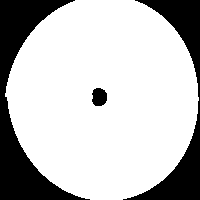

ET =	 2


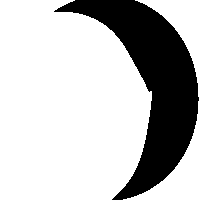

ET =	 3


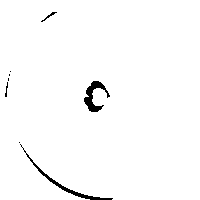

ET =	 4


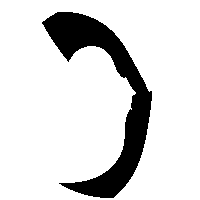

ET =	 5


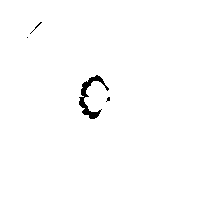

ET =	 6


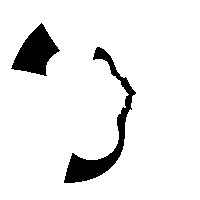

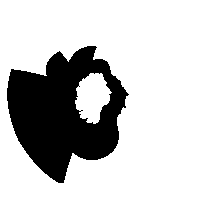

In [24]:
#                                        view smaller - individual escape time starting points
for t in range(1,7):
    print('ET =\t',t)
    I = np.ones(ET_sm.shape)
    I[ET_sm == t] = 0
    display(ncp.mat_to_gray(I))
I = np.ones(ET_sm.shape)
I[ET_sm > 7] = 0
display(ncp.mat_to_gray(I))